In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from google.colab import files

In [7]:
uploaded = files.upload()
df = pd.read_csv('Factory_Salary.csv')
df

Saving Factory_Salary.csv to Factory_Salary.csv


,Date,Profession,Rank,Equipment,Insalubrity,Size_Production,Salary
0,2009-01-01,Metal heater,7,Heating furnaces,22,580,26020.000000
1,2009-01-01,Metal heater,6,Heating furnaces,22,580,22980.000000
2,2009-01-01,Metal heater,5,Heating furnaces,22,580,20350.000000
3,2009-01-01,Metal heater,5,Heating furnaces,22,580,20350.000000
4,2009-01-01,Metal heater,4,Heating furnaces,22,580,18090.000000
...,...,...,...,...,...,...,...
259,2009-08-01,Quality controller,7,Control and measuring equipment,0,1180,26342.235294
260,2009-09-01,Quality controller,7,Control and measuring equipment,0,1080,25044.588235
261,2009-10-01,Quality controller,7,Control and measuring equipment,0,780,22060.000000
262,2009-11-01,Quality controller,7,Control and measuring equipment,0,1020,24266.000000


In [8]:
df.drop(['Date'],axis=1,inplace=True)
df

,Profession,Rank,Equipment,Insalubrity,Size_Production,Salary
0,Metal heater,7,Heating furnaces,22,580,26020.000000
1,Metal heater,6,Heating furnaces,22,580,22980.000000
2,Metal heater,5,Heating furnaces,22,580,20350.000000
3,Metal heater,5,Heating furnaces,22,580,20350.000000
4,Metal heater,4,Heating furnaces,22,580,18090.000000
...,...,...,...,...,...,...
259,Quality controller,7,Control and measuring equipment,0,1180,26342.235294
260,Quality controller,7,Control and measuring equipment,0,1080,25044.588235
261,Quality controller,7,Control and measuring equipment,0,780,22060.000000
262,Quality controller,7,Control and measuring equipment,0,1020,24266.000000


In [9]:
print('\nShape = ', f"{df.shape[0]} x {df.shape[1]}")
print(f'\nTypes:\n{df.dtypes}')

print(f'\nEmpty:\n{pd.isnull(df).sum()}\n')


Shape =  264 x 6

Types:
Profession          object
Rank                 int64
Equipment           object
Insalubrity          int64
Size_Production      int64
Salary             float64
dtype: object

Empty:
Profession         0
Rank               0
Equipment          0
Insalubrity        0
Size_Production    0
Salary             0
dtype: int64



In [10]:
model = preprocessing.LabelEncoder()

model.fit(df['Equipment'])
df['Equipment'] = model.transform(df['Equipment'])
model.fit(df['Profession'])
df['Profession'] = model.transform(df['Profession'])
df

,Profession,Rank,Equipment,Insalubrity,Size_Production,Salary
0,2,7,2,22,580,26020.000000
1,2,6,2,22,580,22980.000000
2,2,5,2,22,580,20350.000000
3,2,5,2,22,580,20350.000000
4,2,4,2,22,580,18090.000000
...,...,...,...,...,...,...
259,5,7,1,0,1180,26342.235294
260,5,7,1,0,1080,25044.588235
261,5,7,1,0,780,22060.000000
262,5,7,1,0,1020,24266.000000


In [11]:
df.columns

Index(['Profession', 'Rank', 'Equipment', 'Insalubrity', 'Size_Production',
       'Salary'],
      dtype='object')

In [12]:
y = df['Salary'].values
x = df[['Profession', 'Rank', 'Equipment', 'Insalubrity',
       'Size_Production']].values

features = pd.Series(['Profession', 'Rank', 'Equipment', 'Insalubrity',
       'Size_Production'])

slr = LinearRegression()
slr.fit(x, y)

coeff_df = pd.DataFrame(slr.coef_, columns=['Coefficient'])
coeff_df['features'] = features

In [13]:
slr.intercept_

-2345.959695712292

In [14]:
x = df[['Size_Production']].values
y = df['Salary'].values
slr = LinearRegression()

slr.fit(x, y)
y_pred = slr.predict(x)

print('Slope: ', slr.coef_)
print('Intercept:', slr.intercept_)

Slope:  [7.44122292]
Intercept: 13676.052581002856


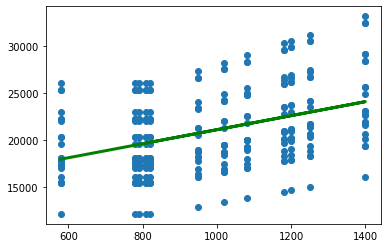

In [15]:
plt.scatter(x, y)
plt.plot(x, slr.predict(x), color='green', linewidth=3)

In [16]:
print('MSE: {:.3f}'.format(mean_squared_error(y, y_pred)))

MSE: 15672462.855
